In [ ]:
!pip install pykrx

In [29]:
import pykrx
#help(pykrx)

In [1]:
# 1. 데이터 소개
from pykrx import stock

# bond도 가능함
# from pykrx import bond

# https://github.com/sharebook-kr/pykrx

# tickers = stock.get_market_ticker_list(조회일자(YYYYmmdd) [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# name = get_market_ticker_name(심볼 [,market=조회할 시장(KOSPI, KOSDAQ, ALL])
# ohlcv = stock.stock.get_market_ohlcv(조회일자(YYYYmmdd) [,앞에 시작일을 넣었다면 종료일] [,심볼] )

# 예시
#tickers = stock.get_market_ticker_list("20220222", market="KOSPI") # 코스피 종목 리스트
#name = stock.get_market_ticker_name("005930") # 심볼 -> 기업 이름
#ohlcv = stock.get_market_ohlcv("20220222", market="KOSPI") # 특정일 코스피 종목들의 OHLCV
raw = stock.get_market_ohlcv( '20130101','20221231' ,'002310') # 특정기간 특정 종목의 OHLCV

In [2]:
raw.tail()

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2022-12-23,39050,39400,38350,39150,29839,1161280550,-0.13
2022-12-26,39000,39600,38750,39400,14244,560669350,0.64
2022-12-27,39100,39450,38700,39400,28728,1122859400,0.00
2022-12-28,39200,39850,38650,39700,36691,1446375450,0.76
2022-12-29,39700,39700,38950,39400,20007,786583900,-0.76


In [32]:
# 2. 수익률 계산하기
import pandas as pd
df=pd.DataFrame(raw['종가'])

In [33]:
df=df.rename(columns={'종가':'close'})
df.head()

,close
날짜,
2013-01-02,15000
2013-01-03,15000
2013-01-04,14950
2013-01-07,14850
2013-01-08,14850


In [34]:
import numpy as np

In [45]:
df['return']=np.log(df['close']/df['close'].shift(1))
df

,close,return
날짜,,
2013-01-02,15000,NaN
2013-01-03,15000,0.000000
2013-01-04,14950,-0.003339
2013-01-07,14850,-0.006711
2013-01-08,14850,0.000000
...,...,...
2022-12-23,39150,-0.001276
2022-12-26,39400,0.006365
2022-12-27,39400,0.000000


In [46]:
## 저는 일단 0을 채워넣었습니다.
df = df.fillna(0)
df

,close,return
날짜,,
2013-01-02,15000,0.000000
2013-01-03,15000,0.000000
2013-01-04,14950,-0.003339
2013-01-07,14850,-0.006711
2013-01-08,14850,0.000000
...,...,...
2022-12-23,39150,-0.001276
2022-12-26,39400,0.006365
2022-12-27,39400,0.000000


In [101]:
# 3. 12월 29일 종가를 기준으로 향후 251일 이후의 수익률 부트스트래핑

#### 원래는 외장함수 불러오는게 맞지만 아무래도 numpy의 random과 다른 것 같아 따로 처리
#import random
#random.seed(4)

np.random.seed(3)

expect = np.random.choice(df['return'], size=251)
print(1 + expect[0])

# 불확실성이 실현된!

1.0019782400121058


In [51]:
df['close'].shape

(2461,)

In [58]:
df['close'].shift(1).iloc[-1]

39700.0

In [65]:
df['close']

날짜
2013-01-02    15000
2013-01-03    15000
2013-01-04    14950
2013-01-07    14850
2013-01-08    14850
              ...  
2022-12-23    39150
2022-12-26    39400
2022-12-27    39400
2022-12-28    39700
2022-12-29    39400
Name: close, Length: 2461, dtype: int32

In [44]:
2461/251

9.804780876494023

In [ ]:
expected_last =(1+expect)*df['close'][-251:]

ex_l=[df['close'][-1]]
for i in range(251):
  expect_l = expected_list[i]*ex_l[-1]
  ex_l.append(expect_l)

In [77]:
df['close'].shift(-3)

날짜
2013-01-02    14850.0
2013-01-03    14850.0
2013-01-04    14900.0
2013-01-07    15000.0
2013-01-08    16000.0
               ...   
2022-12-23    39700.0
2022-12-26    39400.0
2022-12-27        NaN
2022-12-28        NaN
2022-12-29        NaN
Name: close, Length: 2461, dtype: float64

In [76]:
df['close']

날짜
2013-01-02    15000
2013-01-03    15000
2013-01-04    14950
2013-01-07    14850
2013-01-08    14850
              ...  
2022-12-23    39150
2022-12-26    39400
2022-12-27    39400
2022-12-28    39700
2022-12-29    39400
Name: close, Length: 2461, dtype: int32

In [74]:
df['close'][-3:]

날짜
2022-12-27    39400
2022-12-28    39700
2022-12-29    39400
Name: close, dtype: int32

In [88]:
df['close'].shift(-251)[:-251]

날짜
2013-01-02    21350.0
2013-01-03    20800.0
2013-01-04    20600.0
2013-01-07    20450.0
2013-01-08    20500.0
               ...   
2021-12-17    39150.0
2021-12-20    39400.0
2021-12-21    39400.0
2021-12-22    39700.0
2021-12-23    39400.0
Name: close, Length: 2210, dtype: float64

In [84]:
np.array(df['close'].shift(-251).iloc[-1])[:-251]

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [91]:
df['close'].shape[0]-251

2210

In [ ]:
expected_last =(1+expect)*df['close'][-251:]

ex_l=[df['close'][-1]]
for i in range(251):
  expect_l = expected_list[i]*ex_l[-1]
  ex_l.append(expect_l)

In [98]:
1+expect

array([0.99739244, 1.00542007, 0.98535845, 1.01491328, 1.00698815,
       0.9908003 , 1.01673679, 1.00515465, 0.97266345, 1.02686364,
       1.02298952, 1.00782273, 1.01587335, 0.99090312, 0.95470024,
       1.00774197, 1.        , 1.02020271, 1.01432531, 0.97858017,
       1.00527706, 1.01402548, 1.00542007, 0.99435346, 0.98408454,
       0.97637138, 0.98445198, 1.00507615, 1.00930239, 1.03868954,
       1.00944039, 1.00262812, 1.00960007, 0.99141626, 0.99241463,
       1.01049572, 1.0057389 , 1.        , 0.98077837, 1.00126502,
       1.002442  , 1.01904819, 0.98457553, 0.99773499, 1.00904984,
       0.99038454, 1.03261159, 0.98677667, 1.00407748, 1.01015237,
       1.05310983, 1.        , 1.00786374, 1.00619197, 0.97974614,
       1.0020141 , 0.99683043, 0.94143747, 0.99097738, 0.97284901,
       1.01886848, 1.03107364, 0.953291  , 0.97672889, 0.98966399,
       1.01980263, 0.99626168, 0.98031917, 0.97101246, 1.0145563 ,
       1.00348432, 1.05632733, 0.99766082, 0.9900213 , 1.00330

In [96]:
df['close'][-1]

39400

In [99]:
# 4. 각 행의 값을 직전의 종가에 곱하여 251일의 에측 종가를 만들기
predicted_close = df['close'][-1] * (1+ expect)

#predicted_close = np.array (df['close'].shift(251).iloc[-1] ) * (1+ expect)
#predicted_close = np.array (df['close'].shift(1)) * (1+ expect)

#expectClose = (1+ pd.DataFrame(expect)) * df['close']
print(predicted_close)
predicted_close.shape

[39297.26200176 39613.55065829 38823.12293028 39987.58338372
 39675.33305618 39037.5319422  40059.42961881 39603.09323319
 38322.93976595 40458.42750542 40305.78701805 39708.21539184
 40025.40995676 39041.58297343 37615.18948635 39705.03378165
 39400.         40195.98666831 39964.41736552 38556.05876495
 39607.91604977 39952.60372897 39613.55065829 39177.5262299
 38772.93106095 38469.0324353  38787.40815429 39600.00042946
 39766.5142709  40924.36807104 39771.9515149  39503.54802281
 39778.24290492 39061.80049856 39101.13636726 39813.53149298
 39626.11252876 39400.         38642.66762903 39449.84187888
 39496.21494403 40150.49888185 38792.27586917 39310.75873874
 39756.56351948 39021.15092724 40684.8964722  38879.00067292
 39560.6526181  39800.00343568 41492.52711737 39400.
 39709.83121653 39643.96362777 38601.99803796 39479.35551525
 39275.11875441 37092.6363492  39044.50886657 38330.2510308
 40143.41828159 40624.30128301 37559.66548016 38483.11845311
 38992.76123237 40180.22351547 392

(251,)

In [97]:
# 4. 각 행의 값을 직전의 종가에 곱하여 251일의 에측 종가를 만들기

######종혁님의 설명이 필요!!!!!!!!!!! 연호님 등  dataframe으로 바꿔서 제출해야 할 듯
#예측 종가 초기화
#startInx = df['close'].shape[0]-251*2
predicted_close = df['close'].shift(-251)[startInx:-251] * (1+ expect)

#predicted_close = np.array (df['close'].shift(251).iloc[-1] ) * (1+ expect)
#predicted_close = np.array (df['close'].shift(1)) * (1+ expect)

#expectClose = (1+ pd.DataFrame(expect)) * df['close']
print(predicted_close)
predicted_close.shape

날짜
2020-12-18    48573.011662
2020-12-21    49265.583306
2020-12-22    50844.496020
2020-12-23    52876.982089
2020-12-24    52967.576618
                  ...     
2021-12-17    40085.901141
2021-12-20    39784.393293
2021-12-21    39346.864456
2021-12-22    41202.070713
2021-12-23    39602.571140
Name: close, Length: 251, dtype: float64


(251,)

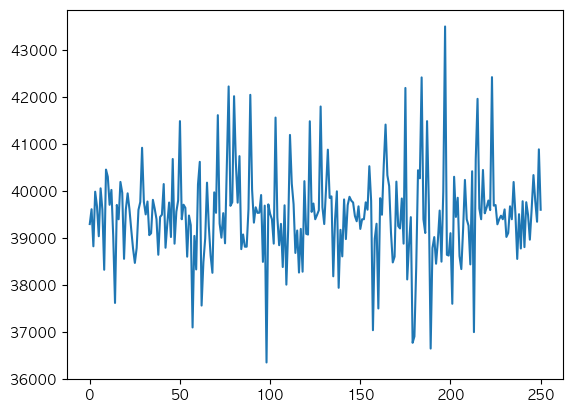

In [100]:
# 5. 251일의 주가 흐름을 line plot으로 그려보기

# 5. 251일의 주가 흐름을 line plot으로 그려보기
import matplotlib.pyplot as plt

plt.plot(predicted_close)

In [104]:
np.random.seed(3)


def Boot(n):
    df['return']=np.log(df['close']/df['close'].shift(1))    
    for i in range(n):
        expect = np.random.choice(df['return'], size=251)
        predicted_close = df['close'][-1] * (1+ expect)
        sum += predicted_close
    return sum/n

In [105]:
Boot(100)

UnboundLocalError: local variable 'sum' referenced before assignment

In [ ]:
# 6. 해당 시행을 1000번, 10000번 반복하여 251일째 (즉, 대략적인 영업일 기준 2023년 12월 31일)의 예측 종가를 히스토그램으로 그려보기 /

df['return']=np.log(df['close']/df['close'].shift(1))
np.random.seed(4)
expect = np.random.choice(df['return'], size=251)
predicted_close = np.array (df['close'].shift(251).iloc[-1] ) * (1+ expect)


def boot(n):
  
  for j in range(n):
    expect_boot = np.random.choice( df['return'], size=251)
    np.array (df['close'].iloc[-1].shift(251) ) * (1+ expect)
    
    
    
    ex_list = (1+ex).tolist()
    ex_last=[df['close'][-1]]
    for i in range(251):
      expect_l = ex_list[i]*ex_last[-1]
      ex_last.append(expect_l)
    lastlast.append(ex_last[-1])
  return(lastlast)

In [ ]:
# 기타 지표 수집법 (다만, 이 지표는 아직까지 검증이 좀 필요함)
fs = stock.get_market_fundamental("20220101", "20221231", "005930")
fs.tail()
# BPS: Book value Per Share : 주당순자산
# PER: Price Earning Ratio : 주가수익비율
# PBR: Price on Book-value Ratio : 주가순자산비율
# EPS: Earning Per Share : 주당순이익
# DIV: Dividend : 배당수익률
# DPS: Dividend Per Share : 주당배당금

In [ ]:
# 
df = stock.get_market_trading_value_by_date("20220101", "20221231", "005930", on="매수")
df.tail()

In [ ]:
# 기타 국내외 주식정보 수집
import FinanceDataReader as fdr

# fdr.DataReader(주식 종목 [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])
# fdr.StockListing(거래소이름("SSE", "SZSE", ...))

samsung = fdr.DataReader("005930")
samsung_period = fdr.DataReader("005930", "2022-01-01", "2022-12-31")
samsung_year = fdr.DataReader("005930", "2021")

# 뉴욕거래소 전체
NYSE_df = fdr.StockListing('NYSE') 

In [ ]:
NYSE_df.tail()

In [ ]:
samsung_period.head()

In [ ]:
# yahoo finance 사용 - 해외특화
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
# yf의 메소드를 재정의해줌(이 부분이 필요!)

# df = pdr.get_data_yahoo(주식 종목(한국주식의 경우 ".KS") [, 시작일(YYYY-mm-dd)] [,종료일(YYYY-mm-dd)])

# 예시
df = pdr.get_data_yahoo("AAPL", "2022-01-01", "2022-12-31")

df